# Лабораторная работа №6. Изучение алгоритма обратного распространения ошибки (метод Back Propagation)

### Импортируем необходимые модули

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from tqdm.auto import tqdm

###  Задаем вектора входов и выходов

In [2]:
X = np.array([4])
Y = np.array([-2 / 10])

In [3]:
X_train = X
X_test = X

### Создаем функции подсчета ошибки и среднеквадратичной ошибки

In [4]:
def loss_func(y_true, y_predicted):
    return y_true - y_predicted

In [5]:
def MSE(y_true, y_predicted):
    return np.square(np.sum((y_true - y_predicted) ** 2))

### Создаем Dense слой

In [6]:
class Dense:
    def __init__(self, in_size, out_size, seed=0):
        np.random.seed(seed)
        # ЕСЛИ ИНИЦИАЛИЗИРОВАТЬ НУЛЯМИ, ТО СЕТЬ ОБУЧАТЬСЯ НЕ БУДЕТ. 
        # БУДЕТ ИЗМЕНЯТЬСЯ ТОЛЬКО ЕДИНИЧНОЕ СМЕЩЕНИЕ
#         self.W = np.zeros(shape=(out_size, in_size))
#         self.b = np.zeros(shape=out_size)
        
        self.W = np.random.normal(scale=0.1, size=(out_size, in_size))
        self.b = np.random.normal(scale=0.1, size=(out_size))
        
    def forward(self, x):
        self.x = x
        self.net = np.dot(self.W, x.transpose()) + self.b
        return self.net
    
    def backward(self, delta, lr=1):
        self.dW = np.outer(delta, self.x)
        self.db = delta
        
        self.next_delta = np.dot(delta, self.W) 
        
        self.W = self.W + lr * self.dW
        self.b = self.b + lr * self.db
        
        return self.next_delta

### Задаем функцию активации

In [7]:
class ActivationFunction:
    
    def forward(self, x):
        self.x = x
        self.out = (1 - np.exp(-x)) / (1 + np.exp(-x))
        return self.out
    
    def backward(self, delta, lr=1):
        return delta * 0.5 * (1 - self.out ** 2)

### Создаем класс полносвязной нейросети

In [8]:
class FullyConnectedNeuralNetwork:
    
    def __init__(self):
        self.d1 = Dense(1, 2)
        self.a1 = ActivationFunction()
        self.d2 = Dense(2, 1)
        self.a2 = ActivationFunction()
        
    def forward(self, x):
        net = self.d1.forward(x)
        net = self.a1.forward(net)
        net = self.d2.forward(net)
        net = self.a2.forward(net)
        
        self.net = net
        return net
    
    def backward(self, dz, lr):
        dz = self.a2.backward(dz, lr)
        dz = self.d2.backward(dz, lr)
        dz = self.a1.backward(dz, lr)
        dz = self.d1.backward(dz, lr)
        return dz
    

In [9]:
net = FullyConnectedNeuralNetwork()

### Обучаем модель

In [10]:
lr = 1
epsilon = 1e-20
loss_train = []
loss_test = []
loss_mse = []

for i in tqdm(range(100)):
    y_predicted = net.forward(X_train)
    delta = loss_func(Y, y_predicted)
    net.backward(delta, lr)
    loss_train.append(delta.item())
    
    y_predicted = net.forward(X_test)
    delta = loss_func(Y, y_predicted)
    loss_test.append(delta.item())
    
    mse = MSE(Y, y_predicted)
    loss_mse.append(mse)
    
    print(f"epoch : {i}\t predict : {y_predicted[0]:.3f}\t MSE : {mse:.3}\t error : {delta[0]:.3}")
    if mse <= epsilon:
        break
    

  0%|          | 0/100 [00:00<?, ?it/s]

epoch : 0	 predict : -0.003	 MSE : 0.00152	 error : -0.197
epoch : 1	 predict : -0.060	 MSE : 0.000388	 error : -0.14
epoch : 2	 predict : -0.099	 MSE : 0.000106	 error : -0.101
epoch : 3	 predict : -0.126	 MSE : 3.02e-05	 error : -0.0742
epoch : 4	 predict : -0.145	 MSE : 8.89e-06	 error : -0.0546
epoch : 5	 predict : -0.160	 MSE : 2.67e-06	 error : -0.0404
epoch : 6	 predict : -0.170	 MSE : 8.12e-07	 error : -0.03
epoch : 7	 predict : -0.178	 MSE : 2.5e-07	 error : -0.0224
epoch : 8	 predict : -0.183	 MSE : 7.73e-08	 error : -0.0167
epoch : 9	 predict : -0.188	 MSE : 2.41e-08	 error : -0.0125
epoch : 10	 predict : -0.191	 MSE : 7.54e-09	 error : -0.00932
epoch : 11	 predict : -0.193	 MSE : 2.37e-09	 error : -0.00697
epoch : 12	 predict : -0.195	 MSE : 7.44e-10	 error : -0.00522
epoch : 13	 predict : -0.196	 MSE : 2.34e-10	 error : -0.00391
epoch : 14	 predict : -0.197	 MSE : 7.4e-11	 error : -0.00293
epoch : 15	 predict : -0.198	 MSE : 2.34e-11	 error : -0.0022
epoch : 16	 predict : 

### Строим график ошибки ```y_true - y_predicted``` на обучающей выборке

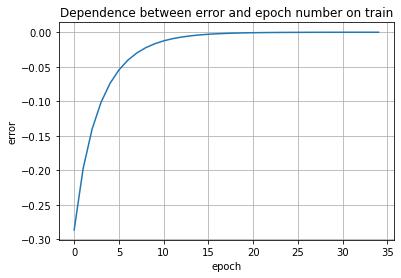

In [11]:
plt.plot(loss_train)
plt.grid()
plt.title('Dependence between error and epoch number on train')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

### Строим график ошибки ```y_true - y_predicted``` на тестовой выборке

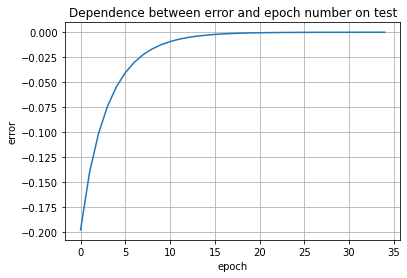

In [12]:
plt.plot(loss_test)
plt.grid()
plt.title('Dependence between error and epoch number on test')
plt.xlabel('epoch')
plt.ylabel('error')
plt.show()

### Строим график среднеквадратичной ошибки ```MSE```

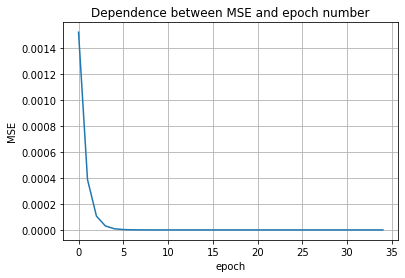

In [13]:
plt.plot(loss_mse)
plt.grid()
plt.title('Dependence between MSE and epoch number')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

### Обученная модель имеет следующие веса

In [14]:
net.d1.W, net.d1.b

(array([[0.07908647],
        [0.03745891]]),
 array([0.07354411, 0.22345012]))

In [15]:
net.d2.W, net.d2.b

(array([[ 0.03368107, -0.04718612]]), array([-0.40322364]))